In [1]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1 | Data Understanding

In [2]:
# Load the Dataset

lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check the Shape of Dataframe

lead_df.shape

(9240, 37)

In [4]:
# Inspect the Dataframe

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check the stats of Dataframe

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the null values in each column in Dataframe

lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Create the table containing total count & percentage of null values in each column

TotalCount = pd.DataFrame(lead_df.isnull().sum().sort_values(ascending=False), columns=['Total Count'])

Percentage = pd.DataFrame(round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending=False), columns=['Percentage'])

pd.concat([TotalCount, Percentage], axis = 1)

,Total Count,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [8]:
# Check for Duplicates

sum(lead_df.duplicated(subset = 'Lead Number')) == 0

True

### Step 2 | Data Cleaning 

In [9]:
# Check the no. of unique values in each column

lead_df.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

Observations:

1) Dropping those columns with only '1' unique values as they won't contribute to the mode

2) Also dropping the variable Prospect ID as it is indicative of the ID of people and won't be of any use in the model

In [10]:
# Dropping the columns as mentioned above

lead_df= lead_df.drop(['Prospect ID', 'Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
lead_df.shape

(9240, 31)

In [11]:
# Replacing 'Select' with NaN as the customer didn't select any of the given options for these columns

lead_df = lead_df.replace('Select', np.nan)

In [12]:
# Checking the percentage of null values in remaining columns

null_count = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
null_count.sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [13]:
# Dropping the columns with higher % of null values (i.e. > 45% of missing data) 

lead_df.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True)

In [14]:
# Checking the percentage of null values again in remaining columns

null_count = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
null_count.sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

In [15]:
# There are few more columns with high % of null values
# Let's analyse those columns and handle the null values
# First start with 'City' column


lead_df.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

Observation:

1) Around 58 percent of values are 'Mumbai' - so we can impute the missing values with 'Mumbai'

In [16]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

In [17]:
lead_df.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [18]:
# Analysing 'Specialization' column

lead_df.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [19]:
# Specialisation column with NaN values

lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Observations:

1) Since there are 36% null values, we will replace those with 'Not Specified'

2) Leads may not have mentioned Specialization for 2 reasons - one being that their specialisation was not in the list or they don't have a specialization yet

In [20]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')
lead_df.Specialization.value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [21]:
# Analysing 'Tags' column

lead_df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [22]:
# Tags column with NaN values

lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Observations:

1) Tags column contains 36% of null values and 35% with "Will revert after reading the email" values

2) As these tags are added based on the understanding of the sales team of the company and also not reliable as the values may vary with time. Hence we can drop this column.

In [23]:
# Drop 'Tags' Column

lead_df = lead_df.drop('Tags', axis=1)

In [24]:
# Analysing 'What matters most to you in choosing a course' column

lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

Observation

1) This column contains almost 30% null values and also remaining data is heavily skewed towards 'Better career prospects'. Hence we can drop this column as almost all the leads are looking to have a better career option.

In [25]:
lead_df = lead_df.drop('What matters most to you in choosing a course', axis=1)

In [26]:
# Analysing 'What is your current occupation' column

lead_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [27]:
# Almost 86% of the values are 'Unemployed'. Hence we can impute the missing values with 'Unemployed'.

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
# Now check the column again

lead_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [29]:
# Analysing 'Country' Column

lead_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Observation 

1) Almost 96% of the data is India & 27% of the data is missing. So dropping this column will not impact the model

In [30]:
# Drop the country column

lead_df = lead_df.drop('Country', axis=1)

In [31]:
# Checking the percentage of null values again in each column

null_count = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
null_count.sort_values(ascending = False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Number                               0.00
Newspaper Article                         0.00
A free copy of Mastering The Interview    0.00
City                                      0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Specialization                            0.00
Search                                    0.00
What is your current occupation           0.00
Lead Origin                               0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Last Notable Activity                     0.00
dtype: float6

In [32]:
# Though we can drop the rows of those columns with null values as they are all under 2% however 
# The 'Lead Source' and 'Last Activity' are crucial variables to identify where the leads are originating from 
# And also to assess the intent of the lead whether they will convert to customer for the company.
# Let's start analysing these 2 columns

lead_df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [33]:
# Replace NaN values, combine all the low frequency labels under the common labels 'Others'

lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Others')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('youtubechannel','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [34]:
# Now check the column again

lead_df['Lead Source'].value_counts(normalize=True)

Google              0.310931
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Social Media        0.006277
Others              0.005844
Live Chat           0.000216
Name: Lead Source, dtype: float64

In [35]:
# Check the 'Last Activity' column

lead_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [36]:
# Repeat the same step as you did for 'Lead source' column
# Replace Nan Values and combine low frequency values with 'Others'

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'Others')
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [37]:
# Now check the column again

lead_df['Last Activity'].value_counts(normalize=True)

Email Opened                 0.371970
SMS Sent                     0.297078
Olark Chat Conversation      0.105303
Page Visited on Website      0.069264
Converted to Lead            0.046320
Email Bounced                0.035281
Others                       0.033333
Email Link Clicked           0.028896
Form Submitted on Website    0.012554
Name: Last Activity, dtype: float64

In [38]:
# Now drop those rows of 'TotalVisits' and 'Page Views Per Visit' columns with missing values as they are under 2% 

lead_df.dropna(inplace = True)

In [39]:
# Checking the percentage of null values again in each column

null_count = round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)
null_count.sort_values(ascending = False)

Lead Number                               0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
Specialization                            0.0
Lead Origin                               0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Last Notable Activity                     0.0
dtype: float64

Now, the data is clean and proceed for next steps

### Step 3 | Univariate & Bivariate Analysis

In [40]:
lead_df.shape

(9103, 21)

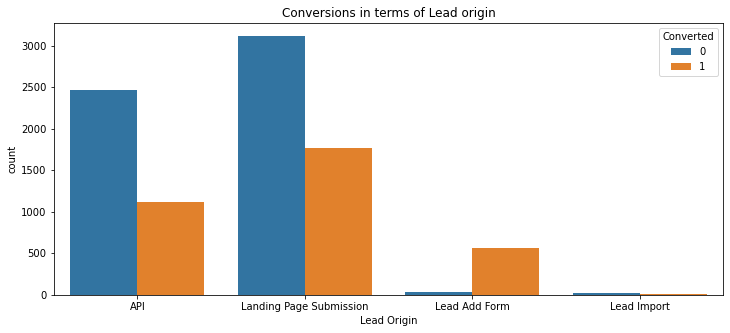

In [41]:
# Lead Origin

plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.title("Conversions in terms of Lead origin")
plt.show()

Inferences

1) Education company is getting higher number of leads and conversions through API & Landing Page Submission

2) Lead Add Form has the highest conversion rate though the number of leads are not high

3) To improve the overall lead conversion rate, we have to improve the lead conversion of API & Landing Page Submission origin and generate more leads from Lead Add Form

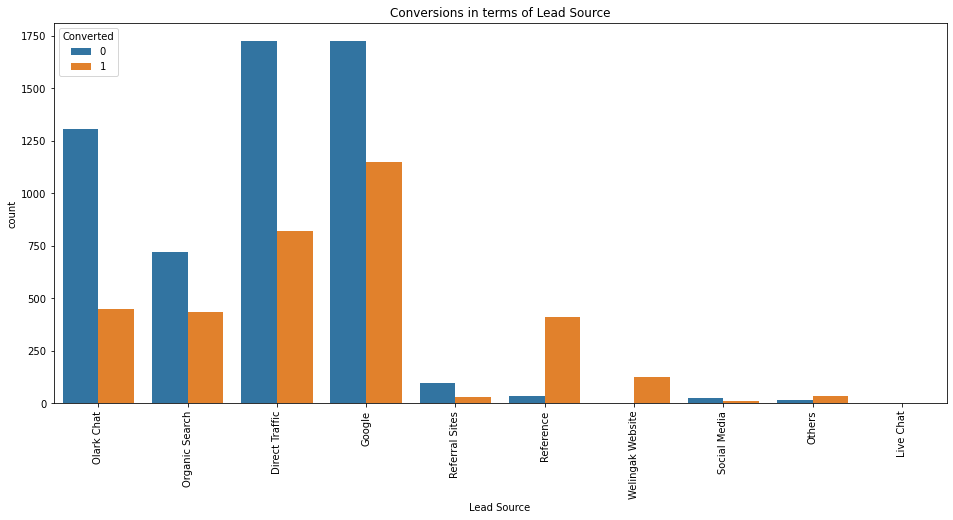

In [42]:
# Lead Source

plt.figure(figsize=(16,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.title("Conversions in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

Inferences

1) Google, Direct Traffic, and Olark chat generate maximum number of leads

2) Conversion rates are high for reference leads & leads through welingak website

3) The company's focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads. Also to generate more leads from references and welingak website

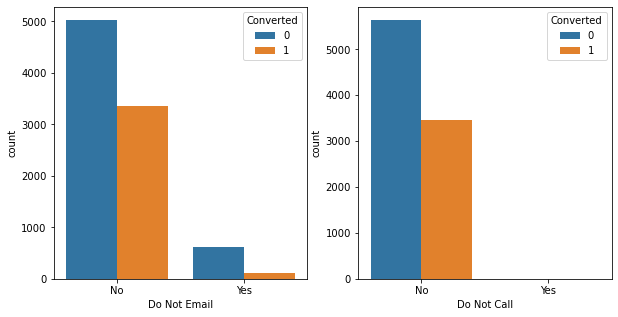

In [43]:
## Do Not Email & Do Not Call

fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df, ax = axs[1])
plt.show()

Inferences

1) Almost 99% of customers do not like to be called or receive emails about the course

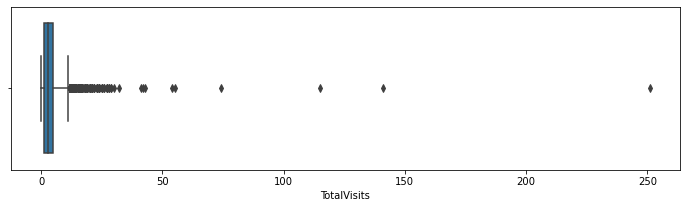

In [44]:
# Total Visits

plt.figure(figsize=(12,3))
sns.boxplot(lead_df['TotalVisits'])
plt.show()

So, we have to handle/treat these outliers

In [45]:
# Checking the Percentile Values for "TotalVisits"

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

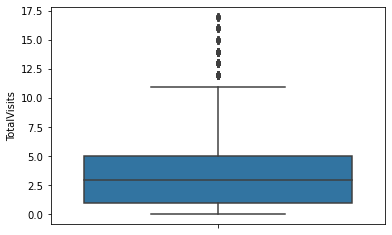

In [46]:
# Outlier Treatment: Let's remove top & bottom 1% of the Outlier values

Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]

Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_df['TotalVisits'])
plt.show() 

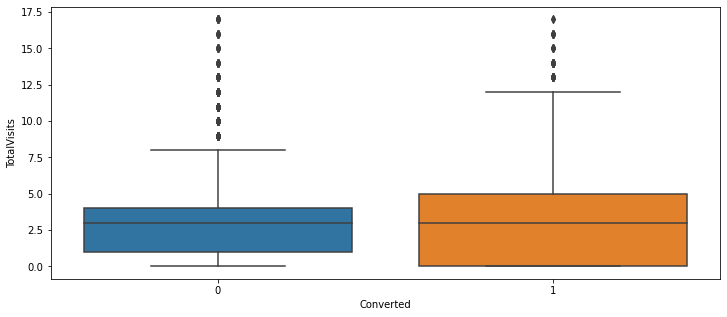

In [47]:
plt.figure(figsize=(12,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

Inferences

1) The median for converted and non-converted leads are same

2) People who visit the website have equal chances (50-50) of applying and not applying for the course

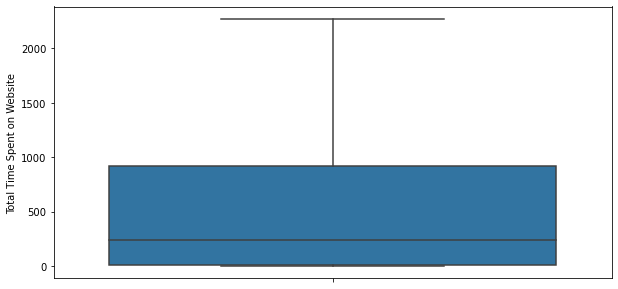

In [48]:
# Checking the next variable

# Total Time Spent on Website

plt.figure(figsize=(10,5))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

As there are no outliers, we need not do the outlier treatment

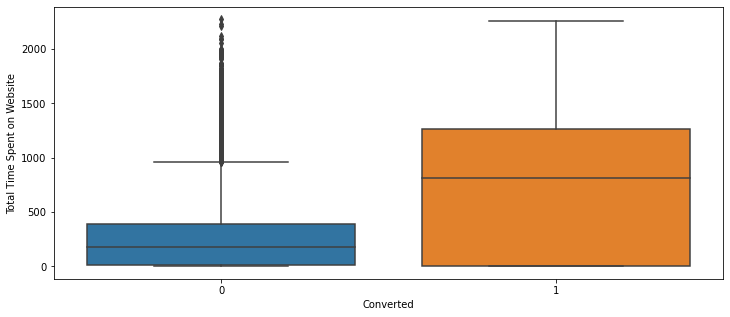

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

Inferences

1) People spending more time on website have more chances of enrolling for / selecting a course

2) People who spend less time on the website didn't opt for any courses

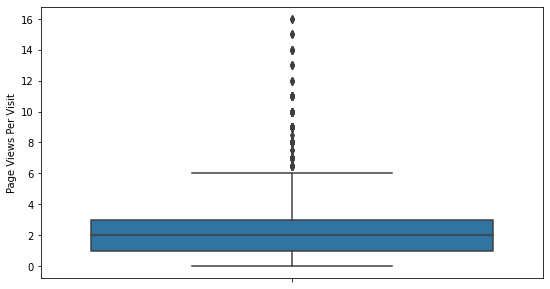

In [50]:
# Page Views Per Visit

plt.figure(figsize=(9,5))
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

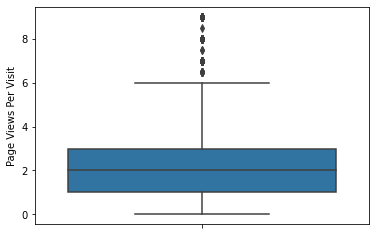

In [51]:
# Outlier treatment - Remove top & bottom 1% 

Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]

Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

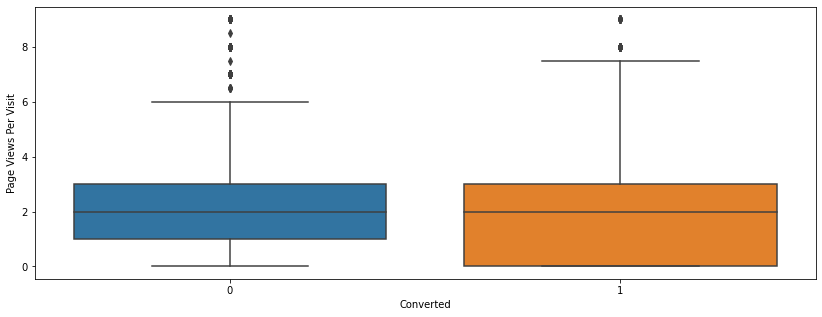

In [52]:
plt.figure(figsize=(14,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()

Inferences

1) Median for converted and unconverted leads is the same

2) Nothing can be said specifically for lead conversion from Page Views Per Visit

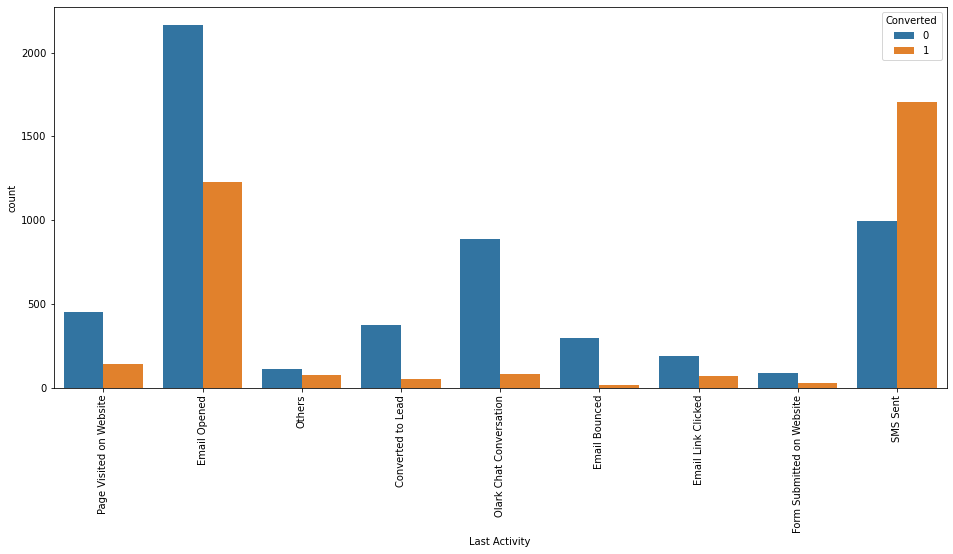

In [53]:
# Last Activity

plt.figure(figsize=(16,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Inferences

1) Maximum leads are generated from people with last activity - "Email opened" and "SMS sent"

2) Olark chat conversation and Page Visited on Website generate significant number of leads but their conversion rate needs to be improved

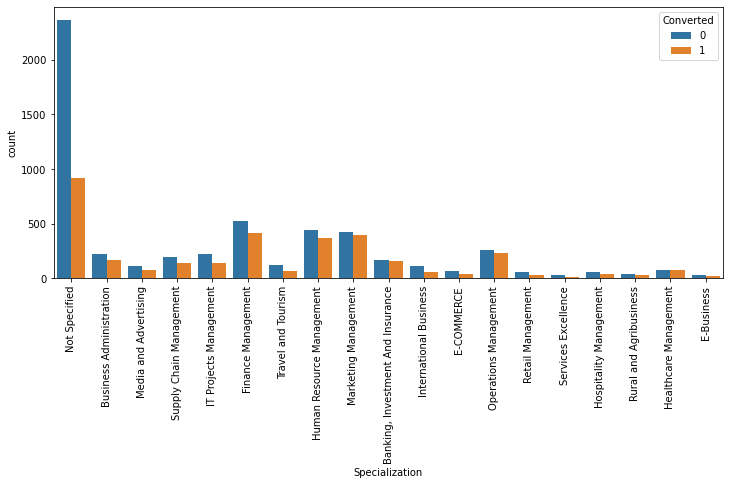

In [54]:
# Specialization

plt.figure(figsize=(12,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Inferences

Most of the specializations have around 45-50% conversion rate

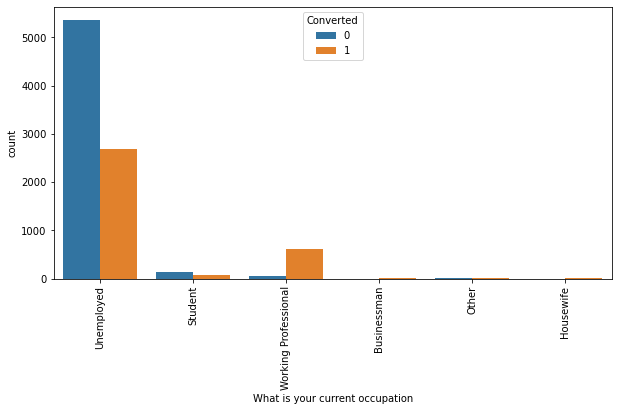

In [55]:
# Occupation

plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Inferences

1) Working Professionals and Unemployed people generate maximum leads

2) Conversion rate for Working Professionals is very high and for Unemployed is also around 40%

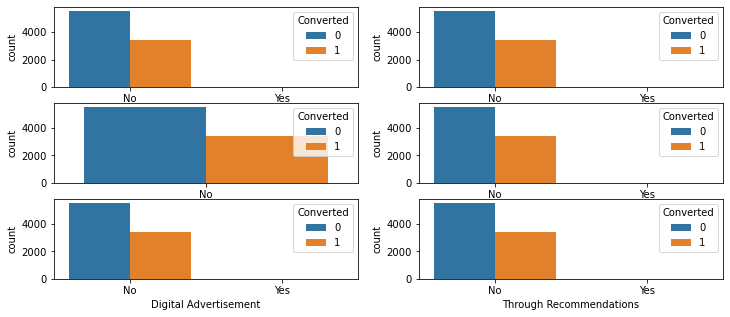

In [56]:
# Search, Newspaper article, X Education Forums, Newspaper, Digital Advertisement,Through Recommendations

plt.figure(figsize=(12,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = lead_df)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df)

plt.show()

Inference

Almost 99% customers have not seen the company's ad in any of the above channels

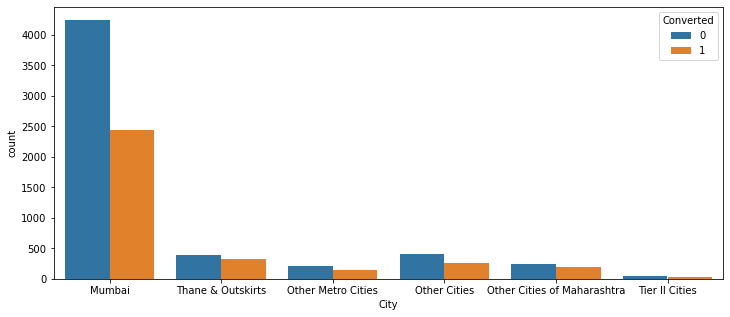

In [57]:
# City

plt.figure(figsize=(12,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df)
plt.show()

Inference

Maximum leads are generated from Mumbai while the conversion rate needs to be improved.

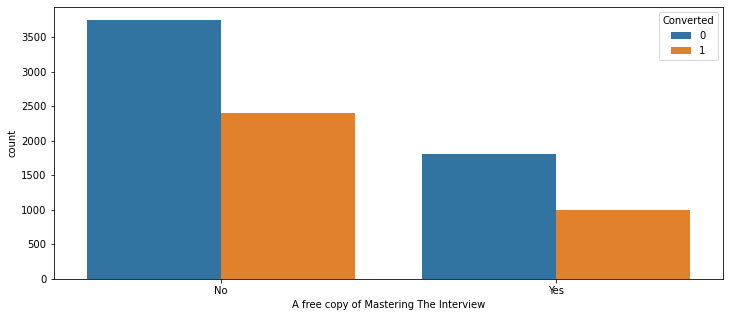

In [58]:
# A free copy of Mastering The Interview

plt.figure(figsize=(12,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)
plt.show()

Inference

1) Most of the customers didn't want the free copy but the conversioon rate is better compared to those who opted for it.

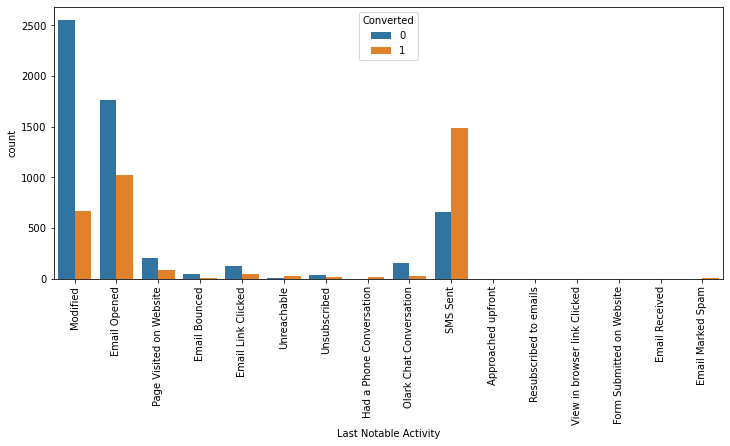

In [59]:
# Last Notable Activity

plt.figure(figsize=(12,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Inference

This column is similar to Last Activity column

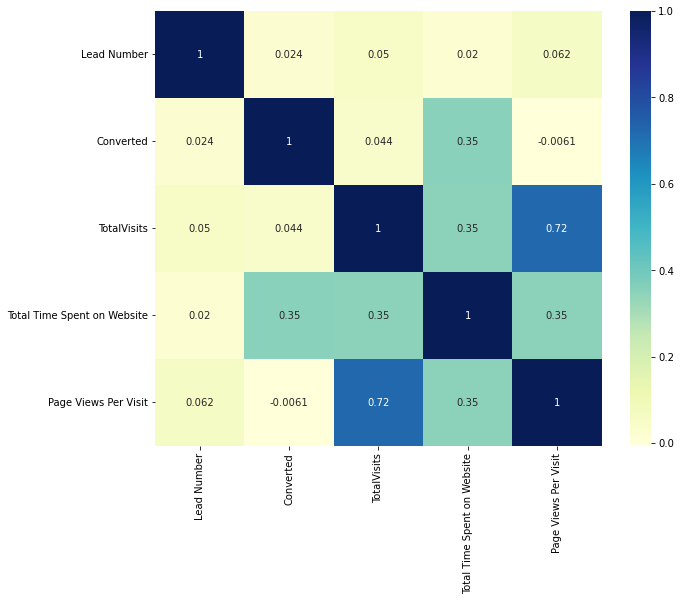

In [60]:
# Checking the correlation among variables

plt.figure(figsize=(10,8))
sns.heatmap(lead_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Inferences

1) Total visits & Page views per visit column are correlated.

2) To avoid multi-collinearity, we should have either of this column in our model

In [61]:
lead_df.shape

(8953, 21)

### Step 4 |  Data Preparation & Dummy Variable Creation

In [62]:
# Converting the binary variables (Yes/No) to 0/1

# List of binary variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [63]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(lead_df[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Combining Dummy Data with the Original Dataset

lead_df = pd.concat([lead_df, dummy_data], axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [66]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'City', 'Last Notable Activity'], 1)

In [67]:
# Ensuring there are no categorical columns left in the dataframe

cols = lead_df.columns
num_cols = lead_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [68]:
# Creating a copy of this dataset in case if we needed it later on

original_df = lead_df.copy()
print(original_df.shape)
print(lead_df.shape)

(8953, 75)
(8953, 75)


### Step 5 | Test-Train Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Putting response variable to y and feature variables to X

y = lead_df['Converted']
X = lead_df.drop(['Converted','Lead Number'], axis=1)

In [71]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
X.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   Search                                                6267 non-null   int64  
 5   Newspaper Article                                     6267 non-null   int64  
 6   X Education Forums                                    6267 non-null   int64  
 7   Newspaper                                             6267 non-null   int64  
 8   Digital Advertisement                                 6

### Step 6 | Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# Create object of StandardScaler

scaler = StandardScaler()

# Apply scaler() to numerical columns

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9196,0,0.668862,1.848117,1.455819,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4696,0,-0.030697,-0.037832,0.399961,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3274,0,0.319082,-0.642138,-0.127967,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2164,0,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,0,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 7 | Feature Selection using RFE

In [77]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

# Running RFE with 15 variables as output

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Call', False, 39),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Search', False, 19),
 ('Newspaper Article', False, 58),
 ('X Education Forums', False, 57),
 ('Newspaper', False, 12),
 ('Digital Advertisement', False, 55),
 ('Through Recommendations', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitte

In [80]:
# List of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Interna

### Step 8 | Model Building 

In [82]:
# BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.6
Date:                Mon, 12 Sep 2022   Deviance:                       5201.2
Time:                        23:23:46   Pearson chi2:                 6.44e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4007      0.124     -3.234      0.001      -0.644      -0.158
Total Time Spent on Website                              1.0651      0.040     26.881      0.000       0.987       1.143
Lead Origin_Landing Page Submission                     -1.1703      0.128     -9.136      0.000      -1.421      -0.919
Lead Origin_Lead Add Form                                3.5496      0.254     13.967      0.000       3.051       4.048
Lead Source_Olark Chat                                   1.0623      0.121      8.775      0.000       0.825       1.300
Lead Source_Welingak Website                             2.8686      1.039      2.760      0.006       0.832       4.905
Last Activity_Email Bounced                             -2.4464      0.497     -4.927      0.000      -3.420      -1.473
Last Activity_Olark Chat Conversation                   -1.5721      0.174     -9.048      0.000      -1.913      -1.232
Last Activity_SMS Sent                                   0.2504      0.141      1.774      0.076      -0.026       0.527
Specialization_Not Specified                            -1.1441      0.124     -9.234      0.000      -1.387      -0.901
What is your current occupation_Housewife               24.2155   2.84e+04      0.001      0.999   -5.56e+04    5.56e+04
What is your current occupation_Working Professional     2.6444      0.201     13.153      0.000       2.250       3.038
Last Notable Activity_Email Bounced                      2.0179      0.658      3.069      0.002       0.729       3.307
Last Notable Activity_Had a Phone Conversation          24.3693   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
Last Notable Activity_SMS Sent                           1.3540      0.149      9.075      0.000       1.062       1.646
Last Notable Activity_Unreachable                        1.6285      0.510      3.196      0.001       0.630       2.627
========================================================================================================================
"""

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Check VIF (variance inflation factor)

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.47
13,Last Notable Activity_SMS Sent,5.01
3,Lead Source_Olark Chat,2.07
8,Specialization_Not Specified,2.03
2,Lead Origin_Lead Add Form,1.58
6,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.40
4,Lead Source_Welingak Website,1.34
5,Last Activity_Email Bounced,1.32
0,Total Time Spent on Website,1.29


Observation

We can drop this column 'What is your current occupation_Housewife' from our model as the p-value is very high.

In [85]:
col1 = col.drop('What is your current occupation_Housewife',1)
col1

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [86]:
# Building Model 2

X_train_sm = sm.add_constant(X_train[col1])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.9
Date:                Mon, 12 Sep 2022   Deviance:                       5209.7
Time:                        23:23:46   Pearson chi2:                 6.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3944      0.124     -3.188      0.001      -0.637      -0.152
Total Time Spent on Website                              1.0635      0.040     26.868      0.000       0.986       1.141
Lead Origin_Landing Page Submission                     -1.1704      0.128     -9.150      0.000      -1.421      -0.920
Lead Origin_Lead Add Form                                3.5557      0.254     14.000      0.000       3.058       4.053
Lead Source_Olark Chat                                   1.0595      0.121      8.757      0.000       0.822       1.297
Lead Source_Welingak Website                             2.8601      1.039      2.752      0.006       0.823       4.897
Last Activity_Email Bounced                             -2.4498      0.496     -4.935      0.000      -3.423      -1.477
Last Activity_Olark Chat Conversation                   -1.5740      0.174     -9.061      0.000      -1.914      -1.233
Last Activity_SMS Sent                                   0.2459      0.141      1.743      0.081      -0.031       0.522
Specialization_Not Specified                            -1.1478      0.124     -9.274      0.000      -1.390      -0.905
What is your current occupation_Working Professional     2.6399      0.201     13.133      0.000       2.246       3.034
Last Notable Activity_Email Bounced                      2.0181      0.657      3.070      0.002       0.730       3.307
Last Notable Activity_Had a Phone Conversation          23.3631   1.48e+04      0.002      0.999   -2.91e+04    2.91e+04
Last Notable Activity_SMS Sent                           1.3539      0.149      9.077      0.000       1.062       1.646
Last Notable Activity_Unreachable                        1.6233      0.509      3.186      0.001       0.625       2.622
========================================================================================================================
"""

In [87]:
# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.47
12,Last Notable Activity_SMS Sent,5.01
3,Lead Source_Olark Chat,2.07
8,Specialization_Not Specified,2.03
2,Lead Origin_Lead Add Form,1.58
6,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.40
4,Lead Source_Welingak Website,1.34
5,Last Activity_Email Bounced,1.32
0,Total Time Spent on Website,1.29


Inference

We can drop this column "Last Notable Activity_Had a Phone Conversation" from our model as the p-value is very high.

In [88]:
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation',1)
col2

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [89]:
# BUILDING MODEL 3

X_train_sm = sm.add_constant(X_train[col2])

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.5
Date:                Mon, 12 Sep 2022   Deviance:                       5226.9
Time:                        23:23:46   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3762      0.123     -3.049      0.002      -0.618      -0.134
Total Time Spent on Website                              1.0616      0.040     26.873      0.000       0.984       1.139
Lead Origin_Landing Page Submission                     -1.1766      0.128     -9.219      0.000      -1.427      -0.926
Lead Origin_Lead Add Form                                3.5445      0.254     13.963      0.000       3.047       4.042
Lead Source_Olark Chat                                   1.0520      0.121      8.707      0.000       0.815       1.289
Lead Source_Welingak Website                             2.8648      1.039      2.757      0.006       0.828       4.902
Last Activity_Email Bounced                             -2.4586      0.496     -4.954      0.000      -3.431      -1.486
Last Activity_Olark Chat Conversation                   -1.5794      0.174     -9.093      0.000      -1.920      -1.239
Last Activity_SMS Sent                                   0.2366      0.141      1.677      0.093      -0.040       0.513
Specialization_Not Specified                            -1.1579      0.124     -9.370      0.000      -1.400      -0.916
What is your current occupation_Working Professional     2.6379      0.201     13.140      0.000       2.244       3.031
Last Notable Activity_Email Bounced                      2.0189      0.657      3.071      0.002       0.730       3.307
Last Notable Activity_SMS Sent                           1.3540      0.149      9.080      0.000       1.062       1.646
Last Notable Activity_Unreachable                        1.6122      0.509      3.165      0.002       0.614       2.611
========================================================================================================================
"""

In [90]:
# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.47
11,Last Notable Activity_SMS Sent,5.01
3,Lead Source_Olark Chat,2.07
8,Specialization_Not Specified,2.03
2,Lead Origin_Lead Add Form,1.58
6,Last Activity_Olark Chat Conversation,1.47
1,Lead Origin_Landing Page Submission,1.40
4,Lead Source_Welingak Website,1.34
5,Last Activity_Email Bounced,1.32
0,Total Time Spent on Website,1.29


Observation

1) As the p-value & VIF values for column 'Last Activity_SMS Sent' are high, we will drop it

In [91]:
col3 = col2.drop('Last Activity_SMS Sent',1)
col3

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [92]:
# BUILDING MODEL 4

X_train_sm = sm.add_constant(X_train[col3])

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.8
Date:                Mon, 12 Sep 2022   Deviance:                       5229.7
Time:                        23:23:46   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3541      0.123     -2.888      0.004      -0.594      -0.114
Total Time Spent on Website                              1.0619      0.039     26.885      0.000       0.984       1.139
Lead Origin_Landing Page Submission                     -1.1743      0.128     -9.204      0.000      -1.424      -0.924
Lead Origin_Lead Add Form                                3.5577      0.254     14.011      0.000       3.060       4.055
Lead Source_Olark Chat                                   1.0463      0.121      8.672      0.000       0.810       1.283
Lead Source_Welingak Website                             2.8752      1.039      2.767      0.006       0.839       4.912
Last Activity_Email Bounced                             -2.4817      0.496     -5.004      0.000      -3.454      -1.510
Last Activity_Olark Chat Conversation                   -1.6002      0.173     -9.239      0.000      -1.940      -1.261
Specialization_Not Specified                            -1.1549      0.124     -9.350      0.000      -1.397      -0.913
What is your current occupation_Working Professional     2.6288      0.201     13.109      0.000       2.236       3.022
Last Notable Activity_Email Bounced                      2.0181      0.657      3.071      0.002       0.730       3.306
Last Notable Activity_SMS Sent                           1.5670      0.079     19.813      0.000       1.412       1.722
Last Notable Activity_Unreachable                        1.5885      0.509      3.120      0.002       0.591       2.586
========================================================================================================================
"""

In [93]:
# Check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.07
7,Specialization_Not Specified,1.99
2,Lead Origin_Lead Add Form,1.56
6,Last Activity_Olark Chat Conversation,1.45
10,Last Notable Activity_SMS Sent,1.43
4,Lead Source_Welingak Website,1.34
5,Last Activity_Email Bounced,1.32
1,Lead Origin_Landing Page Submission,1.31
0,Total Time Spent on Website,1.29
9,Last Notable Activity_Email Bounced,1.25


Observations

1) The VIF values of all the variables are under threshold value 3

2) The p value of all variables are under threshold value 0.05

3) Hence we will consider Model 4 as our final model for further analysis

In [94]:
# Getting the Predicted values on the Train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.880904
4696    0.499581
3274    0.344480
2164    0.036491
1667    0.727546
7024    0.199586
8018    0.047921
778     0.097966
6942    0.047921
4440    0.132302
dtype: float64

In [95]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88090394, 0.49958085, 0.34448018, 0.0364907 , 0.72754613,
       0.19958614, 0.04792051, 0.09796561, 0.04792051, 0.13230152])

In [96]:
# Create a new dataframe containing the actual conversions and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.880904,9196
1,0,0.499581,4696
2,0,0.344480,3274
3,0,0.036491,2164
4,1,0.727546,1667


In [97]:
# Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,1,0.880904,9196,1
1,0,0.499581,4696,0
2,0,0.344480,3274,0
3,0,0.036491,2164,0
4,1,0.727546,1667,1


### Step 9 | Model Evaluation

In [98]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3434  448]
 [ 738 1647]]


In [99]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8107547470879208


In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let us calculate sensitivity 

round((TP / float(TP+FN)),2)

0.69

In [102]:
# Let us calculate specificity

round((TN / float(TN+FP)),2)

0.88

In [103]:
# Calculate false postive rate 

print(FP/ float(TN+FP))

0.11540443070582174


In [104]:
# positive predictive value 

print (TP / float(TP+FP))

0.7861575178997613


In [105]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8231064237775647


### Step 10 | Plotting ROC curve

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

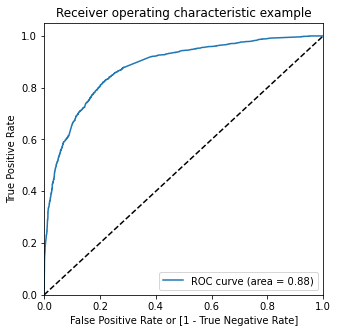

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Observation

The ROC Curve should be a value close to 1. 

Since we are getting a value of 0.88... it indicates a good predictive model.

### Step 11 | Finding Optimal Cut Off Point

In [109]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.880904,9196,1,1,1,1,1,1,1,1,1,1,0
1,0,0.499581,4696,0,1,1,1,1,1,0,0,0,0,0
2,0,0.344480,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.036491,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.727546,1667,1,1,1,1,1,1,1,1,1,0,0


In [110]:
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificty'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,specificity,sensitivity]

print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.380565     0.000000    1.000000
0.1          0.1  0.582416     0.346471    0.966457
0.2          0.2  0.775331     0.711231    0.879665
0.3          0.3  0.792564     0.761463    0.843187
0.4          0.4  0.806446     0.831015    0.766457
0.5          0.5  0.810755     0.884596    0.690566
0.6          0.6  0.798628     0.933024    0.579874
0.7          0.7  0.784586     0.954920    0.507338
0.8          0.8  0.756821     0.972437    0.405870
0.9          0.9  0.723472     0.987378    0.293920


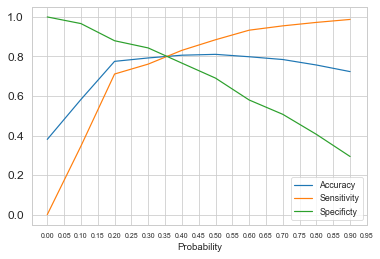

In [111]:
# Let's plot accuracy, sensitivity, & specificity for various probabilities

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=7)
plt.yticks(size=12)
plt.show()

Observation 

From the above curve we can see that the optimal cutoff is at 0.35. 

This is the point where all the parameters - Accuracy, Sensitivity, Specificity are equally balanced

In [112]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.880904,9196,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.499581,4696,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.344480,3274,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.036491,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.727546,1667,1,1,1,1,1,1,1,1,1,0,0,1


In [113]:
# Assigning lead score

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,1,0.880904,9196,1,1,1,1,1,1,1,1,1,1,0,1,88
1,0,0.499581,4696,0,1,1,1,1,1,0,0,0,0,0,1,50
2,0,0.344480,3274,0,1,1,1,1,0,0,0,0,0,0,0,34
3,0,0.036491,2164,0,1,0,0,0,0,0,0,0,0,0,0,4
4,1,0.727546,1667,1,1,1,1,1,1,1,1,1,0,0,1,73


In [114]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8032551460028722

In [115]:
# Create confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[3098,  784],
       [ 449, 1936]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's check the sensitivity 

TP / float(TP+FN)

0.8117400419287212

In [118]:
# Let us calculate specificity

TN / float(TN+FP)

0.7980422462648119

In [119]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.20195775373518804


In [120]:
# Positive predictive value 

print (TP / float(TP+FP))

0.711764705882353


In [121]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8734141528051875


Observation

When we select the optimal cutoff at 0.35, various performance parameters values of Accuracy, Sensitivity, & Specificity 
stand at around 80%

### Step 12 | Metrics (Precision & Recall)

In [122]:
# Calculating Precision

precision = round(TP/float(TP+FP),2)
precision

0.71

In [123]:
# Calculating Recall

recall = round(TP/float(TP+FN),2)
recall

0.81

In [124]:
# Calculating precision using precision_score function from sklearn

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.711764705882353

In [125]:
# Calculating recall using recall_score function from sklearn

recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8117400419287212

Observation

1) Recall- 81% suggests a good model

2) As per our business objective we cannot lose any hot leads which are willing to get converted

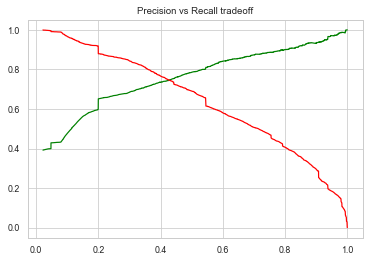

In [126]:
# Let us draw the Precision vs Recall tradeoff curve 

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Conversion_Prob'])

plt.title('Precision vs Recall tradeoff')

plt.plot(thresholds, p[:-1], "g-")  # Plotting precision

plt.plot(thresholds, r[:-1], "r-")  # Plotting Recall

plt.show()

Observations

It is certain from the above graph that there is tradeoff between Precision and Recall.

As the Precision and Recall are inversely related - if one increases other will genuinely decrease.

### Step 13 | Making predictions on the Test Set

In [127]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [128]:
X_test = X_test[col3]

X_test.shape

(2686, 12)

In [129]:
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7681,-0.304384,1,0,0,0,0,0,0,0,0,1,0
984,-0.538073,1,0,0,0,0,0,0,0,0,0,0
8135,0.794688,1,0,0,0,0,0,0,0,0,1,0
6915,-0.614753,1,0,0,0,0,0,0,0,0,0,0
2712,-0.412100,0,0,0,0,0,0,1,0,0,0,0


In [130]:
# Add constant

X_test_sm = sm.add_constant(X_test)

In [131]:
# Making predictions on test set

y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

7681    0.429295
984     0.109113
8135    0.707315
6915    0.101446
2712    0.124918
244     0.216935
4698    0.086151
8287    0.047921
6791    0.305296
8970    0.140523
dtype: float64

In [133]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.429295
984,0.109113
8135,0.707315
6915,0.101446
2712,0.124918


In [134]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Putting prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.429295
1,0,984,0.109113
2,0,8135,0.707315
3,0,6915,0.101446
4,1,2712,0.124918


In [137]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [138]:
# Rearranging the Columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [139]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Conversion_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,7681,0,0.429295,43
1,984,0,0.109113,11
2,8135,0,0.707315,71
3,6915,0,0.101446,10
4,2712,1,0.124918,12


In [140]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [141]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score,Final_Predicted
0,7681,0,0.429295,43,1
1,984,0,0.109113,11,0
2,8135,0,0.707315,71,1
3,6915,0,0.101446,10,0
4,2712,1,0.124918,12,0


In [142]:
# Classifying leads based on Lead score

y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')

y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Conversion_Prob,Lead_Score,Final_Predicted,Lead_Type
1941,4772,1,0.998458,100,1,Hot Lead
2090,8088,1,0.998458,100,1,Hot Lead
2314,5671,1,0.999121,100,1,Hot Lead
1493,5805,1,0.998458,100,1,Hot Lead
622,3444,1,0.996184,100,1,Hot Lead
...,...,...,...,...,...,...
1875,8152,0,0.010532,1,0,Cold Lead
1880,5886,0,0.009513,1,0,Cold Lead
786,4098,0,0.002847,0,0,Cold Lead
888,5279,0,0.003291,0,0,Cold Lead


In [143]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7982129560685034

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)

confusion2

array([[1333,  343],
       [ 199,  811]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.802970297029703

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.795346062052506

In [148]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)

0.7027729636048526

In [149]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.802970297029703

Final Observations:

Let's Compare the Model Performance parameters obtained for Train & Test data:

Train Data -

Accuracy : 80.32%  |  Sensitivity : 81.17%  |  Specificity : 79.80%  |  Precision : 71.17%  |  Recall : 81.17%

Test Data -

Accuracy : 79.82% | Sensitivity : 80.29% | Specificity : 79.53%  | Precision : 70.27%  | Recall : 80.29%

Observations

1) There is around (0.5-0.9%) difference on train and test data's performance metrics

2) This implies that our final model didn't overfit training data and is performing well

3) High Sensitivity ensures that almost all leads who are likely to Convert are correctly predicted 

4) Where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected

In [150]:
# Selecting the Important Features

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.06
Lead Origin_Landing Page Submission                    -1.17
Lead Origin_Lead Add Form                               3.56
Lead Source_Olark Chat                                  1.05
Lead Source_Welingak Website                            2.88
Last Activity_Email Bounced                            -2.48
Last Activity_Olark Chat Conversation                  -1.60
Specialization_Not Specified                           -1.15
What is your current occupation_Working Professional    2.63
Last Notable Activity_Email Bounced                     2.02
Last Notable Activity_SMS Sent                          1.57
Last Notable Activity_Unreachable                       1.59
dtype: float64

In [151]:
# Getting a relative coeffient value for all the features (with the highest coefficient)

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             29.85
Lead Origin_Landing Page Submission                    -33.01
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  29.41
Lead Source_Welingak Website                            80.82
Last Activity_Email Bounced                            -69.76
Last Activity_Olark Chat Conversation                  -44.98
Specialization_Not Specified                           -32.46
What is your current occupation_Working Professional    73.89
Last Notable Activity_Email Bounced                     56.73
Last Notable Activity_SMS Sent                          44.04
Last Notable Activity_Unreachable                       44.65
dtype: float64

In [152]:
# Sorting values based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort')
sorted_idx

Total Time Spent on Website                              5
Lead Origin_Landing Page Submission                      6
Lead Origin_Lead Add Form                                1
Lead Source_Olark Chat                                   7
Lead Source_Welingak Website                             3
Last Activity_Email Bounced                              0
Last Activity_Olark Chat Conversation                   10
Specialization_Not Specified                            11
What is your current occupation_Working Professional     9
Last Notable Activity_Email Bounced                      8
Last Notable Activity_SMS Sent                           4
Last Notable Activity_Unreachable                        2
dtype: int64

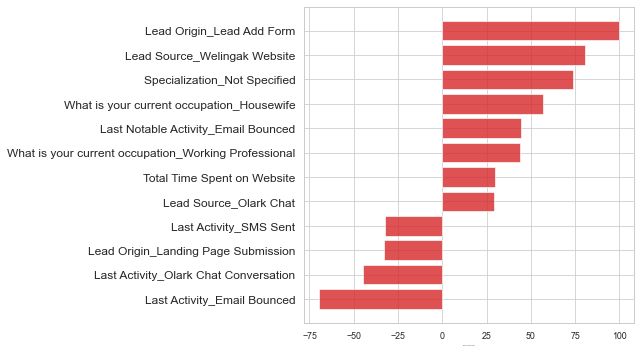

In [153]:
# Show in the plot

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9,5))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=1)

plt.tight_layout()   
plt.show()

In [154]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
2,Lead Origin_Lead Add Form,100.00
4,Lead Source_Welingak Website,80.82
8,What is your current occupation_Working Profes...,73.89


Recommendations

1) The sales team of the X-Education company should focus on the leads having "Lead origin - lead add form", "Occupation - Working Professional", and "Lead source - Wellingak website"

2) Sales Team of the company should focus more on Hot Leads - who are identified as customers having lead score > 35 

3) Other important variables like city, specialization, occupation can potentially explain Conversion better. Hence, it is mandatory to make the customers provide this information, 

4) We have high recall score compared to precision score. Hence this model has an ability to adjust with the company’s requirements in coming future